In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
from IPython import display

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use('ggplot')
mycolors = ['#008BC7','#00C7AC', '#FF8700', '#C0005B']

from sklearn.datasets import make_gaussian_quantiles, make_blobs

### Line Class

In [7]:
class Line:
    def __init__(self, w1, w2, b):        
        self.w1 = w1
        self.w2 = w2
        self.b  = b
        
    def line(self, x1, x2):
        return self.w1*x1 + self.w2*x2 + self.b
    
    def dot_product(self, x1, x2):
        W = np.array([self.w1, self.w2, self.b])
        X = np.array([x1, x2, 1])
        return X.dot(W)
    
    def over_x1(self, x1):
        return (-self.w1*x1 - self.b) / self.w2
    
    def over_x2(self, x2):
        return (-self.w2*x2 - self.b) / self.w1


### Generating some random data:

In [8]:
X1, _ = make_blobs(
    n_samples=50, n_features=2, centers=1, cluster_std=5, 
    center_box=(-1.0, 1.0), shuffle=True, random_state=16 )

### Define a line:

$ w_1*x_1 + w_2*x_2 + b = 0$

$w_1 = 3, w_2 = 2, b = 0$

In [9]:
line_1   = Line(w1=3, w2=2, b=0)

In [10]:
cc = np.array([ 1 if line_1.line(x_i[0],x_i[1]) > 0 else -1 for x_i in X1])

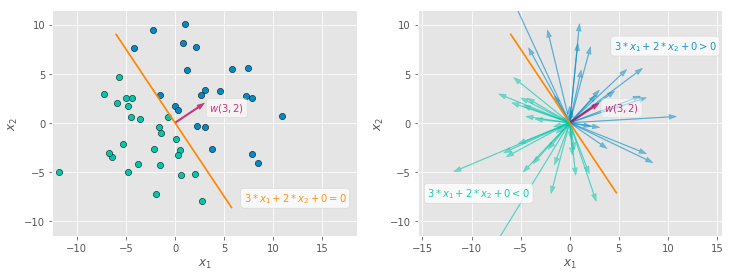

In [11]:
plt.figure(figsize=(12,5))
# --- Figure 1 --- #
plt.subplot(1, 2, 1)

lbl1 = r'$%d*x_1 + %d*x_2 + %d > 0 $' % (line_1.w1, line_1.w2, line_1.b)
lbl2 = r'$%d*x_1 + %d*x_2 + %d < 0 $' % (line_1.w1, line_1.w2, line_1.b)

# Data
indx = cc == 1
plt.scatter(X1[indx,0], X1[indx,1],   marker='o', c=mycolors[0], s=39, edgecolor='k', label=lbl1)
plt.scatter(X1[~indx,0], X1[~indx,1], marker='o', c=mycolors[1], s=39, edgecolor='k', label=lbl2)
plt.xlim(-12.5,18.5); plt.ylim(-11.5,11.5);
plt.xlabel(r'$x_1$'); plt.ylabel(r'$x_2$');

# Decision boundary:
x1range  = np.arange(-6,6,0.25) 
plt.plot(x1range, line_1.over_x1(x1range), c=mycolors[2], lw=1.7)
plt.annotate(r'$%d*x_1 + %d*x_2 + %d = 0$' % (line_1.w1, line_1.w2, line_1.b), xy=(7, -8), 
             xycoords="data", color=mycolors[2], fontsize=10, fontweight='bold', alpha=0.9,
             bbox=dict(boxstyle="round", fc="w", ec="0.8", alpha=0.8))

# Weight vector:
plt.arrow(0, 0, line_1.w1, line_1.w2, length_includes_head= True,
          head_width=0.5, fc=mycolors[3], ec=mycolors[3], alpha=0.75, width=0.15 )

plt.annotate(r"$w (%d, %d)$" % (line_1.w1, line_1.w2), xy=(line_1.w1+0.5, line_1.w2-0.8), 
             xycoords="data", color=mycolors[3], fontsize=10, fontweight='bold', alpha=0.8,
             bbox=dict(boxstyle="round", fc="w", ec="0.8", alpha=0.6))


# Legend:
#plt.legend(
#    bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#    ncol=2, mode="expand", borderaxespad=0. )

plt.gca().set_aspect('equal', adjustable='box')    

# --- Figure 2 --- #
plt.subplot(1, 2, 2)

lbl1 = r'$%d*x_1 + %d*x_2 + %d > 0 $' % (line_1.w1, line_1.w2, line_1.b)
lbl2 = r'$%d*x_1 + %d*x_2 + %d < 0 $' % (line_1.w1, line_1.w2, line_1.b)

# Data as vectors:
for coord in X1[indx,...]:
    plt.arrow(0, 0, coord[0], coord[1], length_includes_head= True,
          head_width=0.5, fc=mycolors[0], ec=mycolors[0], alpha=0.5, width=0.07 )

for coord in X1[~indx,...]:
    plt.arrow(0, 0, coord[0], coord[1], length_includes_head= True,
          head_width=0.5, fc=mycolors[1], ec=mycolors[1], alpha=0.5, width=0.07 )

# Decision boundary:
x1range  = np.arange(-6,4.9,0.25) 
plt.plot(x1range, line_1.over_x1(x1range), c=mycolors[2], lw=1.7)


# Weight vector:
plt.arrow(0, 0, line_1.w1, line_1.w2, length_includes_head= True,
          head_width=0.5, fc=mycolors[3], ec=mycolors[3], alpha=0.75, width=0.15 )

plt.annotate(r"$w (%d, %d)$" % (line_1.w1, line_1.w2), xy=(line_1.w1+0.5, line_1.w2-0.8), 
             xycoords="data", color=mycolors[3], fontsize=10, fontweight='bold', alpha=0.8,
             bbox=dict(boxstyle="round", fc="w", ec="0.8", alpha=0.5))


plt.annotate(r'$%d*x_1 + %d*x_2 + %d > 0$' % (line_1.w1, line_1.w2, line_1.b), xy=(4.5, 7.5), 
             xycoords="data", color=mycolors[0], fontsize=10, fontweight='bold', alpha=0.9, 
             bbox=dict(boxstyle="round", fc="w", ec="0.8", alpha=0.75))
plt.annotate(r'$%d*x_1 + %d*x_2 + %d < 0$' % (line_1.w1, line_1.w2, line_1.b), xy=(-14.5, -7.5), 
             xycoords="data", color=mycolors[1], fontsize=10, fontweight='bold', alpha=0.9, 
             bbox=dict(boxstyle="round", fc="w", ec="0.8", alpha=0.8))

plt.xlim(-15.5,15.5); plt.ylim(-11.5,11.5);
plt.xlabel(r'$x_1$'); plt.ylabel(r'$x_2$');


plt.gca().set_aspect('equal', adjustable='box')    

# Close:
plt.show()

## Perceptron

In [12]:
def plot_res(w1,w2,b,iteration):
    predicted_line = Line(w1=w1, w2=w2, b=b)
    plt.figure();
    plt.gca().cla();
    
    plt.scatter(X1[indx,0], X1[indx,1],   marker='o', c=mycolors[0], s=39, edgecolor='k', label=lbl1)
    plt.scatter(X1[~indx,0], X1[~indx,1], marker='o', c=mycolors[1], s=39, edgecolor='k', label=lbl2)
    plt.xlim(-14.5,14.5); plt.ylim(-11.7,11.7);
    plt.xlabel(r'$x_1$'); plt.ylabel(r'$x_2$');
    
    # Decision boundary:
    x1range  = np.arange(-15,15,0.5) 
    plt.plot(x1range, predicted_line.over_x1(x1range), c=mycolors[2], lw=1.7)
    
    # Iteration indicator:
    plt.annotate("Iteration: %d" % iteration, xy=(-12, -9), 
             xycoords="data", color=mycolors[1], fontsize=11, fontweight='bold', alpha=0.9, 
             bbox=dict(boxstyle="round", fc="w", ec="0.8", alpha=0.8))

    display.clear_output(wait=True)
    display.display(plt.gcf());
    plt.close(plt.gcf());


In [190]:
class Perceptron(object):
    def __init__(self):
        self.W = np.random.rand(2) - 0.5
        self.b = np.random.rand(1) - 0.5
        self.hist = list()
        self.hist.append( np.concatenate([self.W, self.b]) )
 
    def predict(self, sample):
        z = sample.dot(self.W) + self.b
        a = np.array([1 if s > 0 else -1 for s in z])
        return a
 
    def train(self, X, y, learning_rate=1, max_epochs=15):
        i = 0
        errors = 1
        while errors and i < max_epochs:
            i += 1
            errors = 0
            for example, answer in zip(X, y):
                error  = int(answer - self.predict(example))/2
                if error:
                    self.hist.append( np.concatenate([self.W, self.b]) )
                self.W = self.W + error * learning_rate * example
                self.b = self.b + error * learning_rate
                errors += abs(error)
                
            plot_res(self.W[0],self.W[1],self.b,i)
            

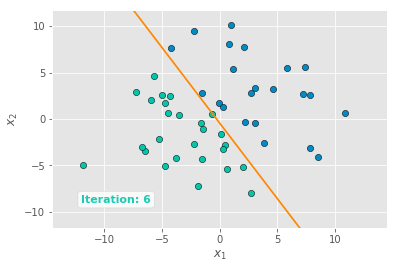

In [193]:
perc = Perceptron()
plot_seq =perc.train(X1, cc, learning_rate=0.05, max_epochs=50)

fig size: 72.0 DPI, size in inches [ 6.  4.]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 0


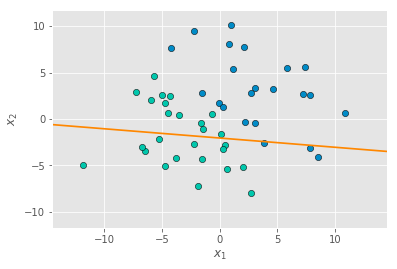

In [199]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig, ax = plt.subplots()
#fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
#ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
ax.scatter(X1[indx,0], X1[indx,1],   marker='o', c=mycolors[0], s=39, edgecolor='k', label=lbl1)
ax.scatter(X1[~indx,0], X1[~indx,1], marker='o', c=mycolors[1], s=39, edgecolor='k', label=lbl2)
ax.set_xlim(-14.5,14.5); ax.set_ylim(-11.7,11.7);
ax.set_xlabel(r'$x_1$'); ax.set_ylabel(r'$x_2$');

x1range  = np.arange(-15,15,0.5) 
line, = ax.plot(x1range, Line(w1=2, w2=1, b=0).over_x1(x1range), c=mycolors[2], lw=1.7)
#line, = ax.plot(x, x - 5, 'r-', linewidth=2)

hist = perc.hist
def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    
    line.set_ydata(Line(w1=hist[i][0], w2=hist[i][1], b=hist[i][2]).over_x1(x1range))
    return line, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, len(perc.hist)), interval=1933)
anim.save('test.mp4', writer=writer)